In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
pwd

'/Users/shaqurcasco/Downloads/Cf_Acheivement6/script 6.1'

###   Content
##### 1. Import data and libraries
##### 2. Data wrangling
##### 3. Data cleaning
##### 4. Plotting a choropleth

##### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S.
country_geo = '/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/us-states.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/us-states.json',)
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/us-states.json'

In [105]:
# importing the dataset
df = pd.read_pickle('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_US_Ecom2.pkl')

In [112]:
df.head(4)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Range
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,Low_Profit
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,Medium_profit
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,Low_Profit
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,107.9580,Medium_profit


In [113]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Profit_Range'],
      dtype='object')

In [114]:
df.shape

(3312, 20)

#### 2. Data wrangling

In [117]:
# Select only the necessary columns and put them in a list called columns

columns = ["Order Date",
"Ship Mode", 
"Customer ID",
"Segment",
"Country", 
"City", 
"State", 
"Region",
"Category", 
"Sub-Category", 
"Sales",
"Quantity", 
"Discount",
"Profit", 
"Profit_Range"
]

In [118]:
# creating of subset of the column i need 
df_subset1 = df[columns]

In [22]:
df_subset1.head()

,Ship Mode,Customer ID,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Range
0,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,48.896,4,0.2,8.5568,Low_Profit
1,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,474.430,11,0.0,199.2606,Medium_profit
2,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,Central,Office Supplies,Binders,3.600,2,0.0,1.7280,Low_Profit
3,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Storage,454.560,5,0.2,107.9580,Medium_profit
4,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,141.420,5,0.6,187.3815,Medium_profit


#### Consistency checks

In [119]:
df_subset1.isnull().sum()

Order Date      0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Profit_Range    0
dtype: int64

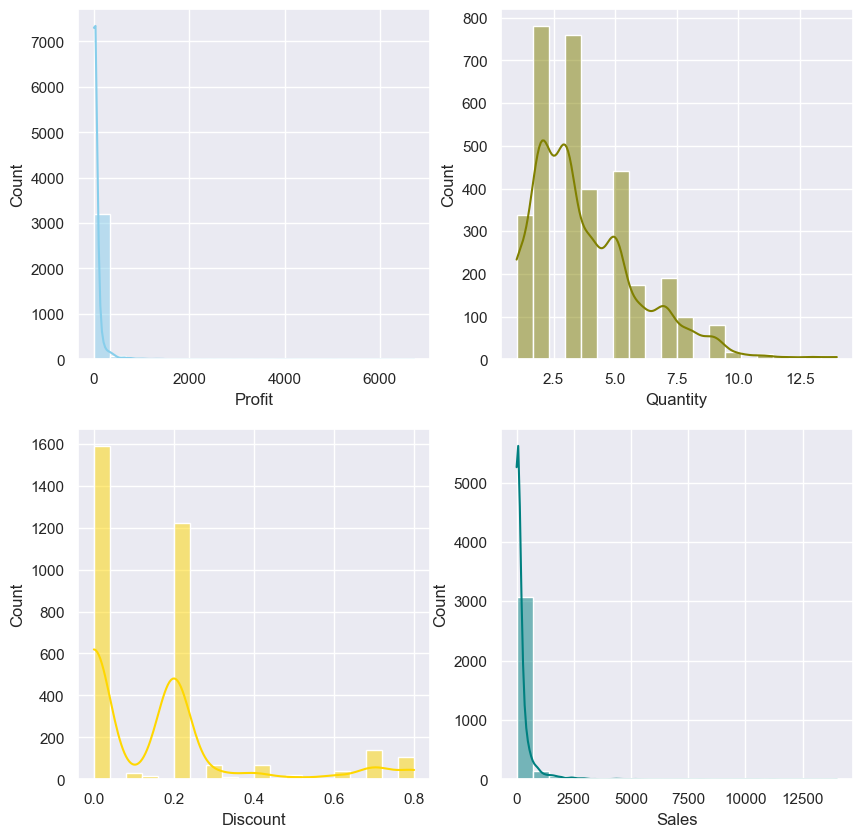

In [120]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(df_subset1['Profit'], bins=20, kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(df_subset1['Quantity'], bins=20, kde = True, color="olive", ax=axs[0, 1])
sns.histplot(df_subset1['Discount'], bins=20, kde = True, color="gold", ax=axs[1, 0])
sns.histplot(df_subset1['Sales'], bins=20, kde = True, color="teal", ax=axs[1, 1])
plt.savefig('fig.png')



In [121]:
# Creating clean subset of the sales to eliminate some extreme values
df_clean_data1 = df_subset1[df_subset1['Sales'] <= 300]

In [122]:
# checking the size of the dataframe
df_clean_data1.shape

(2728, 15)

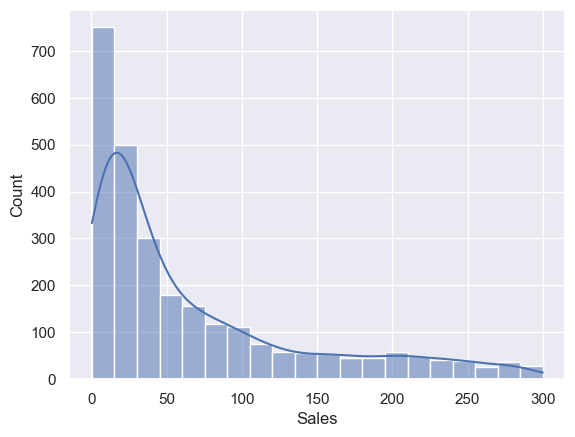

In [123]:
# Creating the histogram after excluding the 
sns.set(style="darkgrid")
sns.histplot(df_clean_data1['Sales'], bins=20, kde = True)
plt.savefig('Sales_lessthan300.png')

In [124]:
# Creating subset of the sales
df_clean = df_clean_data1[df_clean_data1['Profit'] <= 300]

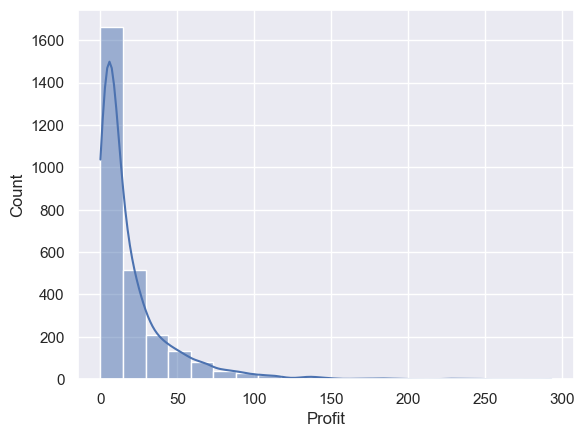

In [125]:
#creating distribution graph of profit column
sns.set(style="darkgrid")
sns.histplot(df_clean['Profit'], bins=20, kde = True)
plt.savefig('profitless300_lessthan300.png')

In [126]:
# checking the size of the dataframe
df_clean.shape

(2720, 15)

##### 4. Plotting a choropleth

In [127]:
# checking the head of the dataframe
df_clean.head()

,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Range
0,01-01-20,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,48.896,4,0.2,8.5568,Low_Profit
2,01-01-20,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,Central,Office Supplies,Binders,3.600,2,0.0,1.7280,Low_Profit
4,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,141.420,5,0.6,187.3815,Medium_profit
6,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Art,12.736,4,0.2,2.2288,Low_Profit
7,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Binders,6.470,5,0.8,9.7050,Low_Profit


In [128]:
# checking the features of the properties
for feature in data['features']:
    properties = feature['properties']
    print(properties)

{'name': 'Alabama'}
{'name': 'Alaska'}
{'name': 'Arizona'}
{'name': 'Arkansas'}
{'name': 'California'}
{'name': 'Colorado'}
{'name': 'Connecticut'}
{'name': 'Delaware'}
{'name': 'Florida'}
{'name': 'Georgia'}
{'name': 'Hawaii'}
{'name': 'Idaho'}
{'name': 'Illinois'}
{'name': 'Indiana'}
{'name': 'Iowa'}
{'name': 'Kansas'}
{'name': 'Kentucky'}
{'name': 'Louisiana'}
{'name': 'Maine'}
{'name': 'Maryland'}
{'name': 'Massachusetts'}
{'name': 'Michigan'}
{'name': 'Minnesota'}
{'name': 'Mississippi'}
{'name': 'Missouri'}
{'name': 'Montana'}
{'name': 'Nebraska'}
{'name': 'Nevada'}
{'name': 'New Hampshire'}
{'name': 'New Jersey'}
{'name': 'New Mexico'}
{'name': 'New York'}
{'name': 'North Carolina'}
{'name': 'North Dakota'}
{'name': 'Ohio'}
{'name': 'Oklahoma'}
{'name': 'Oregon'}
{'name': 'Pennsylvania'}
{'name': 'Rhode Island'}
{'name': 'South Carolina'}
{'name': 'South Dakota'}
{'name': 'Tennessee'}
{'name': 'Texas'}
{'name': 'Utah'}
{'name': 'Vermont'}
{'name': 'Virginia'}
{'name': 'Washingto

In [148]:
# Geographical map of Profit distribution across state
map = folium.Map(location = [100, 0], zoom_start = 3)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_clean,
    columns = ['State','Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Profit").add_to(map)
folium.LayerControl().add_to(map)

map

######  Kenturky, Arkansa, and Detroit are the states with higher profit 
######  Indiana, louisiana are states with medium profit
###### Iowa, new york, mississippi are states with low profit


In [130]:
#Saving profit distribution across states
map.save('state_profit.html')

In [152]:
# Geographical map of sales distribution across states
map_Sales = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_clean,
    columns = ['State','Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales").add_to(map_Sales)
folium.LayerControl().add_to(map_Sales)

map_Sales

######  Kenturky and Louisiana, indiana and Detroit sales are states with higher number of sales and ohio, Atlanta are states with low sales

In [132]:
#saving distribution of sales across states
map_Sales.save('state_sales.html')

In [139]:
# Geographical map of Discount distribution across state
map_Discount = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_clean,
    columns = ['State','Discount'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Discount").add_to(map_Discount)
folium.LayerControl().add_to(map_Discount)

map_Discount

##### Florida, Oregon and illinois are state that received more Discount betwen 0.6 - 0.7
##### Pennsylvania, Ohio, New York and North Carolina are state with Discount between 0.5 -0.6
##### Oklahoma, Lowa, North Dakota, Missouri are state with Discount between 0.3 -0.4

In [140]:
#saving distribution of discount across states
map_Discount.save('state_Discount.html')

In [141]:
#Geographical map of quantity distribution across state
map_Quantity = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_clean,
    columns = ['State','Quantity'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Quantity").add_to(map_Quantity)
folium.LayerControl().add_to(map_Quantity)

map_Quantity

###### State with order quantity between 6-8  ( North Carlolina and pennsylvania)
###### State with  order Quantity between 5-6 ( Oklahoma, Iowa and North Dakota)
###### State with order Quantity between 2-4 ( South Dakota, Colorado and Utah)
###### State with order Quantity between 1-2 (Nebraska, Texas, Detroit)

In [142]:
#saving the distribution of quantity across states
map_Quantity.save('state_Quantity.html')

###### from the analysis, it was discovered that state like Louisiana have medium sales and generate more profit and also quantity from detroit was one of the lowest and  profit from detroit was higher. 


In [154]:
#saving the new dataframe as pickle
df_clean.to_pickle('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_clean_6.3.pkl')